# MLP Binary Classification

In [1]:
# Importing the library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # visualization library based on matplotlib
from IPython.display import display # Manage multiple output per cell

In [2]:
# Manage UTF-8 issue
import sys  
reload(sys)  
sys.setdefaultencoding('utf8')

In [3]:
all_features = ["A_MEANS_FIVE_AC","A_MEANS_FIVE_AF","A_MEANS_FIVE_AR","A_MEANS_FIVE_AS","A_MEANS_FIVE_AST","A_MEANS_FIVE_AY","A_MEANS_FIVE_FTAG","A_MEANS_FIVE_FTHG","A_MEANS_FIVE_FTR_A","A_MEANS_FIVE_FTR_D","A_MEANS_FIVE_FTR_H","A_MEANS_FIVE_HC","A_MEANS_FIVE_HF","A_MEANS_FIVE_HR","A_MEANS_FIVE_HS","A_MEANS_FIVE_HST","A_MEANS_FIVE_HTAG","A_MEANS_FIVE_HTHG","A_MEANS_FIVE_HTR_A","A_MEANS_FIVE_HTR_D","A_MEANS_FIVE_HTR_H","A_MEANS_FIVE_HY","H_MEANS_FIVE_AC","H_MEANS_FIVE_AF","H_MEANS_FIVE_AR","H_MEANS_FIVE_AS","H_MEANS_FIVE_AST","H_MEANS_FIVE_AY","H_MEANS_FIVE_FTAG","H_MEANS_FIVE_FTHG","H_MEANS_FIVE_FTR_A","H_MEANS_FIVE_FTR_D","H_MEANS_FIVE_FTR_H","H_MEANS_FIVE_HC","H_MEANS_FIVE_HF","H_MEANS_FIVE_HR","H_MEANS_FIVE_HS","H_MEANS_FIVE_HST","H_MEANS_FIVE_HTAG","H_MEANS_FIVE_HTHG","H_MEANS_FIVE_HTR_A","H_MEANS_FIVE_HTR_D","H_MEANS_FIVE_HTR_H","H_MEANS_FIVE_HY","A_MEANS_THREE_AC","A_MEANS_THREE_AF","A_MEANS_THREE_AR","A_MEANS_THREE_AS","A_MEANS_THREE_AST","A_MEANS_THREE_AY","A_MEANS_THREE_FTAG","A_MEANS_THREE_FTHG","A_MEANS_THREE_FTR_A","A_MEANS_THREE_FTR_D","A_MEANS_THREE_FTR_H","A_MEANS_THREE_HC","A_MEANS_THREE_HF","A_MEANS_THREE_HR","A_MEANS_THREE_HS","A_MEANS_THREE_HST","A_MEANS_THREE_HTAG","A_MEANS_THREE_HTHG","A_MEANS_THREE_HTR_A","A_MEANS_THREE_HTR_D","A_MEANS_THREE_HTR_H","A_MEANS_THREE_HY","H_MEANS_THREE_AC","H_MEANS_THREE_AF","H_MEANS_THREE_AR","H_MEANS_THREE_AS","H_MEANS_THREE_AST","H_MEANS_THREE_AY","H_MEANS_THREE_FTAG","H_MEANS_THREE_FTHG","H_MEANS_THREE_FTR_A","H_MEANS_THREE_FTR_D","H_MEANS_THREE_FTR_H","H_MEANS_THREE_HC","H_MEANS_THREE_HF","H_MEANS_THREE_HR","H_MEANS_THREE_HS","H_MEANS_THREE_HST","H_MEANS_THREE_HTAG","H_MEANS_THREE_HTHG","H_MEANS_THREE_HTR_A","H_MEANS_THREE_HTR_D","H_MEANS_THREE_HTR_H","H_MEANS_THREE_HY","A_STD_FIVE_AC","A_STD_FIVE_AF","A_STD_FIVE_AR","A_STD_FIVE_AS","A_STD_FIVE_AST","A_STD_FIVE_AY","A_STD_FIVE_FTAG","A_STD_FIVE_FTHG","A_STD_FIVE_FTR_A","A_STD_FIVE_FTR_D","A_STD_FIVE_FTR_H","A_STD_FIVE_HC","A_STD_FIVE_HF","A_STD_FIVE_HR","A_STD_FIVE_HS","A_STD_FIVE_HST","A_STD_FIVE_HTAG","A_STD_FIVE_HTHG","A_STD_FIVE_HTR_A","A_STD_FIVE_HTR_D","A_STD_FIVE_HTR_H","A_STD_FIVE_HY","H_STD_FIVE_AC","H_STD_FIVE_AF","H_STD_FIVE_AR","H_STD_FIVE_AS","H_STD_FIVE_AST","H_STD_FIVE_AY","H_STD_FIVE_FTAG","H_STD_FIVE_FTHG","H_STD_FIVE_FTR_A","H_STD_FIVE_FTR_D","H_STD_FIVE_FTR_H","H_STD_FIVE_HC","H_STD_FIVE_HF","H_STD_FIVE_HR","H_STD_FIVE_HS","H_STD_FIVE_HST","H_STD_FIVE_HTAG","H_STD_FIVE_HTHG","H_STD_FIVE_HTR_A","H_STD_FIVE_HTR_D","H_STD_FIVE_HTR_H","H_STD_FIVE_HY","A_STD_THREE_AC","A_STD_THREE_AF","A_STD_THREE_AR","A_STD_THREE_AS","A_STD_THREE_AST","A_STD_THREE_AY","A_STD_THREE_FTAG","A_STD_THREE_FTHG","A_STD_THREE_FTR_A","A_STD_THREE_FTR_D","A_STD_THREE_FTR_H","A_STD_THREE_HC","A_STD_THREE_HF","A_STD_THREE_HR","A_STD_THREE_HS","A_STD_THREE_HST","A_STD_THREE_HTAG","A_STD_THREE_HTHG","A_STD_THREE_HTR_A","A_STD_THREE_HTR_D","A_STD_THREE_HTR_H","A_STD_THREE_HY","H_STD_THREE_AC","H_STD_THREE_AF","H_STD_THREE_AR","H_STD_THREE_AS","H_STD_THREE_AST","H_STD_THREE_AY","H_STD_THREE_FTAG","H_STD_THREE_FTHG","H_STD_THREE_FTR_A","H_STD_THREE_FTR_D","H_STD_THREE_FTR_H","H_STD_THREE_HC","H_STD_THREE_HF","H_STD_THREE_HR","H_STD_THREE_HS","H_STD_THREE_HST","H_STD_THREE_HTAG","H_STD_THREE_HTHG","H_STD_THREE_HTR_A","H_STD_THREE_HTR_D","H_STD_THREE_HTR_H","H_STD_THREE_HY","INFO_Div"]

## Importing Data

In [4]:
# DB Sqlite connection
import sqlite3
db = "/Users/thibaultclement/Project/ligue1-predict/src/notebook/data/db/soccer_predict.sqlite"
conn = sqlite3.connect(db)
cur = conn.cursor()

In [5]:
# Get all prematch
df = pd.read_sql_query("SELECT * FROM pre_matchs ORDER BY INFO_Date ASC;", conn)
df = (df[df.columns.drop(['index'])])
df.shape

(25275, 190)

In [6]:
# Remove all game between June (include) and October (include)
df['INFO_Date'] = pd.to_datetime(df['INFO_Date'])
df['INFO_Date'].dt.month
df = df[(df['INFO_Date'].dt.month < 6) | (df['INFO_Date'].dt.month > 10)]
df.shape

(18027, 190)

In [7]:
# Remove league I don't want
#df = df[(df['INFO_Div'] != 'E1') & (df['INFO_Div'] != 'E2') & (df['INFO_Div'] != 'SC0')]
#df = df[(df['INFO_Div'] == 'D1')]
#df = df[(df['INFO_Div'] == 'E0')]
df.shape

(18027, 190)

In [8]:
# Check the average odd
df.INFO_PSA.mean()

4.617278024911034

In [9]:
# Removing column where bet for Away Victory is too high or too low
df = df.drop(df[df.INFO_BbAvA < 1].index)
df = df.drop(df[df.INFO_BbAvA > 10].index)
df.shape

(17098, 190)

In [10]:
df.INFO_PSA.mean()

3.8607903149976477

In [11]:
# Create a INFO_WIN column containing the gain. If bet success it's equal to odd -1, else -1 (lose you bet)
df['INFO_WIN'] = df['INFO_PSA']-1
df.loc[df.INFO_FTR != 'A', 'INFO_WIN'] = -1

In [12]:
# Statistic for Away victory odd after removing low and high odds
display(plt.show(), 100. * df.INFO_FTR.value_counts() / len(df.INFO_FTR))

None

H    43.426132
A    30.196514
D    26.377354
Name: INFO_FTR, dtype: float64

In [13]:
# How much did you win per match if bet on all
df.INFO_WIN.mean()

-0.3181480633342042

In [14]:
# Keep season 2016/2017 for further test and don't use it for traning
import datetime
date_start_current_season = datetime.date(2016, 8, 1)
df_current_season = df[(df['INFO_Date'] > date_start_current_season)]
df = df[(df['INFO_Date'] < date_start_current_season)]

In [15]:
df_current_season.shape

(2062, 191)

In [16]:
# Prepare the dataset
features_list = all_features
X = pd.get_dummies(df[features_list])
y = pd.get_dummies(df)['INFO_FTR_A'].astype('bool_')
X_current_season = pd.get_dummies(df_current_season[features_list])
y_current_season = pd.get_dummies(df_current_season)['INFO_FTR_A'].astype('bool_')

## Preprocessing Data

In [17]:
# Standardize features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X)
X = sc_X.transform(X)
X_current_season = sc_X.transform(X_current_season)

In [18]:
# Impute of missing values (NaN) with the mean
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(X)
X = imp.transform(X)
X_current_season = imp.transform(X_current_season)

In [19]:
# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [20]:
# Import model
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
classifier = MLPClassifier(random_state=0)

## Tuning Hyper-parameters

In [21]:
# Applying Grid Search to find the best hyper-parameters for our Model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.classification import log_loss
from sklearn.metrics import make_scorer
import time

start = time.time()

parameters = [{
    'hidden_layer_sizes': [(10, ), (30, ), (100, ), (300, )],
    'activation': ['identity', 'logistic', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.01, 0.03, 1, 3, 10]
}]
grid_search = GridSearchCV(estimator=classifier,
                          param_grid=parameters,
                          scoring=make_scorer(log_loss, greater_is_better=True),
                          cv=8,
                          n_jobs=-1)
grid_search.fit(X_train, y_train)

time.time() - start

5691.537605047226

In [22]:
# Extract best score calculated with the GridSearchCV
best_score = grid_search.best_score_
display(best_score)

14.268544802050025

In [23]:
# Extract best hyper-parameter calculated with the GridSearchCV
best_params = grid_search.best_params_
best_params

{'activation': 'relu',
 'alpha': 0.03,
 'hidden_layer_sizes': (30,),
 'solver': 'lbfgs'}

In [47]:
# Get all results of Grid Search
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_activation,param_alpha,param_hidden_layer_sizes,param_solver,params,rank_test_score,...,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,1.491077,0.004886,10.350175,1.001732e+01,identity,0.01,"(10,)",lbfgs,"{u'alpha': 0.01, u'activation': u'identity', u...",104,...,10.348528,1.005790e+01,10.532387,9.960390e+00,9.823212,1.002789e+01,0.110777,0.001193,0.276796,0.033760
1,4.078676,0.003875,10.274695,1.003701e+01,identity,0.01,"(10,)",sgd,"{u'alpha': 0.01, u'activation': u'identity', u...",140,...,10.217200,1.008040e+01,10.401054,9.971638e+00,9.980807,1.005039e+01,0.502252,0.000677,0.226286,0.031513
2,1.448671,0.003556,10.428937,1.004077e+01,identity,0.01,"(10,)",adam,"{u'alpha': 0.01, u'activation': u'identity', u...",89,...,10.401061,1.004664e+01,10.506121,9.952891e+00,10.007074,1.003539e+01,0.225608,0.000249,0.226176,0.035370
3,2.116878,0.006228,10.333766,1.001263e+01,identity,0.01,"(30,)",lbfgs,"{u'alpha': 0.01, u'activation': u'identity', u...",118,...,10.322262,1.006540e+01,10.479856,9.967891e+00,9.875743,1.005039e+01,0.202200,0.002264,0.247458,0.036190
4,5.105949,0.004307,10.350172,1.007358e+01,identity,0.01,"(30,)",sgd,"{u'alpha': 0.01, u'activation': u'identity', u...",107,...,10.295994,1.005789e+01,10.374792,1.000164e+01,10.112130,1.012540e+01,0.645282,0.000636,0.285276,0.037762
5,2.823926,0.005679,10.346894,1.004217e+01,identity,0.01,"(30,)",adam,"{u'alpha': 0.01, u'activation': u'identity', u...",109,...,10.348528,1.006164e+01,10.217200,1.001289e+01,10.243462,1.012165e+01,1.270854,0.002996,0.286752,0.038270
6,5.809419,0.014235,10.353456,1.001217e+01,identity,0.01,"(100,)",lbfgs,"{u'alpha': 0.01, u'activation': u'identity', u...",102,...,10.374794,1.004665e+01,10.479856,9.975391e+00,9.875743,1.003164e+01,1.158754,0.006489,0.259892,0.037526
7,6.437249,0.007211,10.330483,1.003748e+01,identity,0.01,"(100,)",sgd,"{u'alpha': 0.01, u'activation': u'identity', u...",121,...,10.479854,1.011040e+01,10.453589,9.990390e+00,10.059599,1.005039e+01,1.016256,0.000866,0.263947,0.046297
8,2.116352,0.006824,10.645526,1.024282e+01,identity,0.01,"(100,)",adam,"{u'alpha': 0.01, u'activation': u'identity', u...",67,...,10.663727,1.028292e+01,10.978914,1.026042e+01,10.190947,1.015541e+01,0.995964,0.001663,0.267359,0.091431
9,11.454793,0.019570,10.346893,1.001826e+01,identity,0.01,"(300,)",lbfgs,"{u'alpha': 0.01, u'activation': u'identity', u...",110,...,10.374794,1.004665e+01,10.506121,9.975391e+00,9.875743,1.005039e+01,1.009851,0.004970,0.259106,0.033973


## Evaluating Model

In [24]:
# Train a new classifier using the best parameters found by the grid search
clf = MLPClassifier(random_state=0)
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [25]:
# Predict target values
y_pred = clf.predict(X_test)

In [26]:
# Predict probabilities
y_probs = clf.predict_proba(X_test)

In [27]:
# Compute precision, recall, F-measure and support
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.35463756819953235, 0.34262048192771083, 0.34852546916890081, None)

In [28]:
# Compute the confusion Matrix
df_confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,False,True,All
Actual,,,
False,2355,828,3183
True,873,455,1328
All,3228,1283,4511


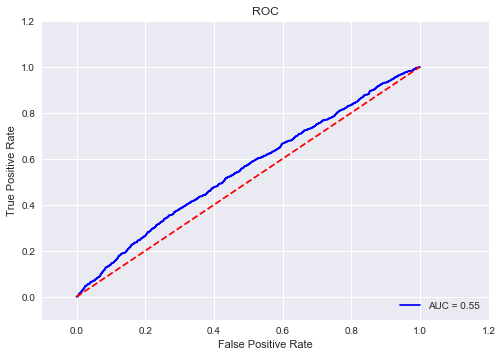

In [29]:
# Plot a ROC curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test.ravel(), y_probs[:, 1].ravel())
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

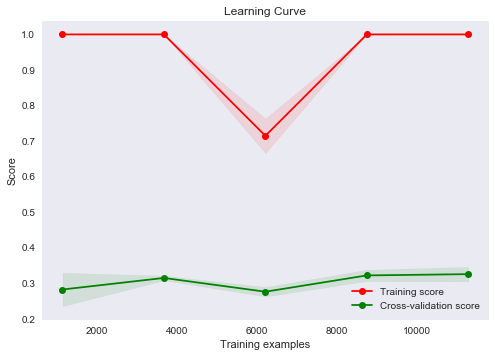

In [30]:
# Plot a leqrning curve
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(clf, 'Learning Curve', X, y, cv=4, n_jobs=-1).show()
plt.show()

# ALL DATASET TEST

In [31]:
# Apply on all the dataset
X_pred = clf.predict(X)
df['pred'] = X_pred
df_bet_away = df.drop(df[df.pred == 0].index)

In [32]:
# How many Away victory bet I did on Away Victory on all dataset
df_bet_away.shape

(4484, 192)

In [33]:
# What will be the real result of what I bet Home victory on all dataset
display(plt.show(), 100. * df_bet_away.INFO_FTR.value_counts() / len(df_bet_away.INFO_FTR))

None

A    81.534344
H    10.838537
D     7.627119
Name: INFO_FTR, dtype: float64

In [34]:
# Score for all dataset
precision_recall_fscore_support(y, X_pred, average='binary') 

(0.8153434433541481, 0.80724221682490616, 0.81127260623543773, None)

In [35]:
# Making the confusion Matrix
df_confusion = pd.crosstab(y, X_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,False,True,All
Actual,,,
False,9679,828,10507
True,873,3656,4529
All,10552,4484,15036


In [36]:
df_bet_away.INFO_WIN.mean()

1.264141297154203

# SEASON 2016/2017 TEST

In [37]:
# Apply on current season that is not use for train and test set
X_pred_current_season = clf.predict(X_current_season)
df_current_season['pred'] = X_pred_current_season
#df_bet_away_current_season = df_current_season.drop(df_current_season[df_current_season.pred == 0].index)
X_prob_current_season = clf.predict_proba(X_current_season)
df_current_season['prob'] = X_prob_current_season[:,1:]
df_current_season['prob_less_bet'] = df_current_season['prob'] - df_current_season['INFO_BbAvA'].apply(lambda x: 1/x)
df_bet_away_current_season = df_current_season[df_current_season.prob_less_bet > 0.1]
df_bet_away_current_season = df_bet_away_current_season[df_bet_away_current_season.INFO_BbAvA > 2]
df_bet_away_current_season = df_bet_away_current_season[df_bet_away_current_season.INFO_BbAvA < 4]

In [38]:
# How many Away victory bet I did on Away Victory
df_bet_away_current_season.shape

(387, 194)

In [39]:
X_pred_current_season.shape

(2062,)

In [40]:
# What will be the real result of what I bet Away victory
display(plt.show(), 100. * df_bet_away_current_season.INFO_FTR.value_counts() / len(df_bet_away_current_season.INFO_FTR))

None

H    40.051680
A    30.749354
D    29.198966
Name: INFO_FTR, dtype: float64

In [41]:
# Score for this current season
precision_recall_fscore_support(y_current_season, X_pred_current_season, average='binary') 

(0.34788732394366195, 0.38958990536277605, 0.36755952380952378, None)

In [42]:
# Making the confusion Matrix
df_confusion = pd.crosstab(y_current_season, X_pred_current_season, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,False,True,All
Actual,,,
False,965,463,1428
True,387,247,634
All,1352,710,2062


In [43]:
df_bet_away_current_season.INFO_WIN.mean()

-0.11589147286821701

In [44]:
X_prob = clf.predict_proba(X)
df['prob'] = X_prob[:,1:]
df['prob_less_bet'] = df['prob'] - df['INFO_BbAvA'].apply(lambda x: 1/x)

In [45]:
df_bet_prod_away = df[df.prob_less_bet > 0.2]
df_bet_prod_away = df_bet_prod_away[df_bet_prod_away.INFO_BbAvA > 2]
df_bet_prod_away = df_bet_prod_away[df_bet_prod_away.INFO_BbAvA < 4]
df_bet_prod_away.INFO_WIN.mean()

1.2134544468546615